In [1]:
import numpy as np
import astropy
import astropy.nddata
import astropy.units as u
import FunctionLib as FL

In [3]:
wavelengths = np.array([1211, 1212, 1213, 1214, 1215]) * u.AA
a=astropy.nddata.NDDataArray(wavelengths)
redshift=astropy.units.Quantity(0.5, u.dimensionless_unscaled)
test=FL.Spectrum_1d(a, redshift=0.5,observed_flux_nu=u.Quantity(np.array([1, 2, 3, 4, 5]), u.Jy))

In [4]:
test.restframe_wavelengths

NDDataArray([807.33333333, 808.        , 808.66666667, 809.33333333,
             810.        ], unit='Angstrom')

In [14]:
with astropy.io.fits.open('./goodsn-wide-v2_prism-clear_1211_6205.spec.fits') as hdul:
    data = hdul[1].data
    header = hdul[1].header
    wavelengths = data['wave']*u.micron
    fluxes = data['flux']*u.uJy
    fluxes_err = data['err']

    test= FL.Spectrum_1d(wavelengths, 1.5,astropy.nddata.NDDataArray(fluxes))

In [15]:
test

Spectrum_1d(z=1.500, λ_obs=0.58 - 5.34 micron, 435 points)

Text(0, 0.5, 'Flux (uJy)')

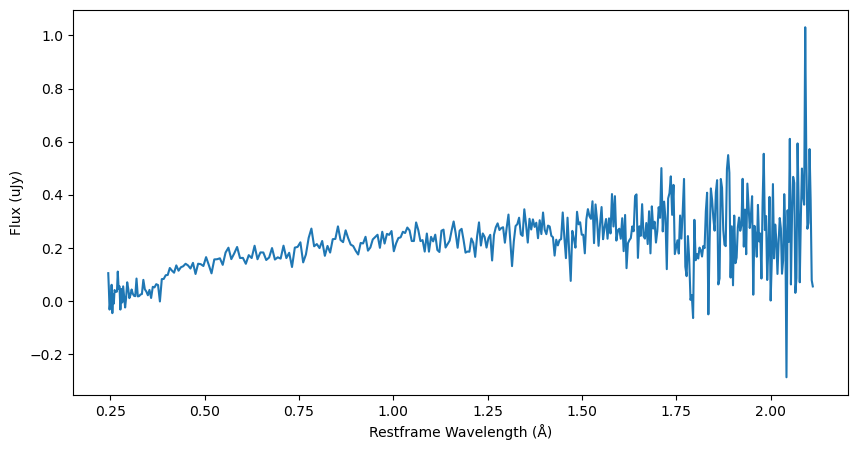

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(test.restframe_wavelengths, test.observed_flux_nu, label='Observed Flux (ν)')
plt.xlabel('Restframe Wavelength (Å)')
plt.ylabel('Flux (uJy)')

Text(0.5, 0, 'Restframe Wavelength (Å)')

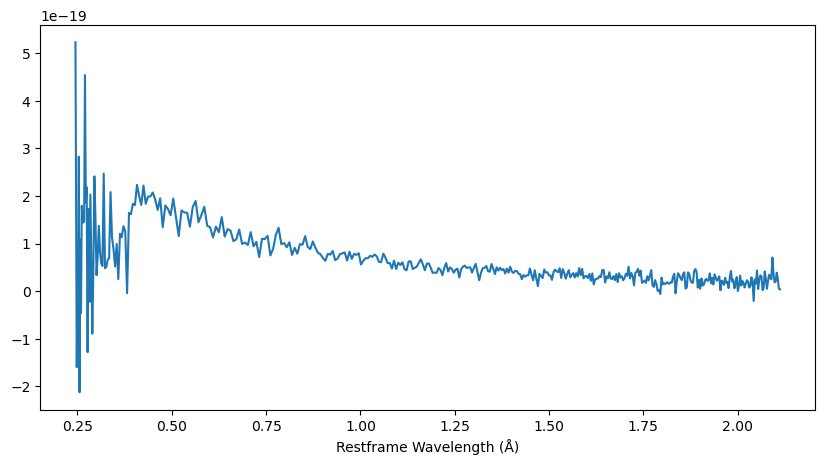

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(test.restframe_wavelengths, test.observed_flux_lambda, label='Observed Flux (λ)')
plt.xlabel('Restframe Wavelength (Å)')